In [1]:
### General imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
from matplotlib.animation import FuncAnimation
from matplotlib import rc
import GPy
### --- Figure config
LEGEND_SIZE = 15

In [2]:
#Historical month and sunspot data (SILSO)
h_month = []
h_sunspot = []
with open('SN_m_tot_V2.0.txt') as f:
    for line in f:
        arr = line.split()
        month_val = (1/12)*(int(arr[1])-1)
        h_month.append(round(float(arr[0])+month_val,2))
        h_sunspot.append(float(line.split()[3]))

In [3]:
h_month[0:11]

[1749.0,
 1749.08,
 1749.17,
 1749.25,
 1749.33,
 1749.42,
 1749.5,
 1749.58,
 1749.67,
 1749.75,
 1749.83]

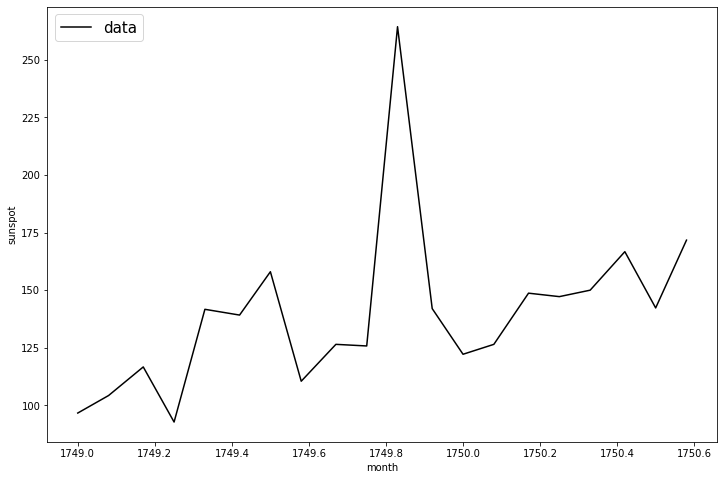

In [4]:
plt.figure(figsize=(12, 8))
plt.plot(h_month[0:20], h_sunspot[0:20], "k", label="data")
plt.legend(loc=2, prop={'size': LEGEND_SIZE})
plt.xlabel("month")
plt.ylabel("sunspot")
plt.show()

In [5]:
import json

#Predicted month and sunspot (SWPC data)
p_month = []
p_sunspot = []
with open('predicted-solar-cycle.json') as json_file:
    data = json.load(json_file)
    for row in data:
        arr = row["time-tag"].split('-')
        month_val = (1/12)*(int(arr[1])-1)
        p_month.append(round(float(arr[0])+month_val,2))
        p_sunspot.append(float(row["predicted_ssn"]))

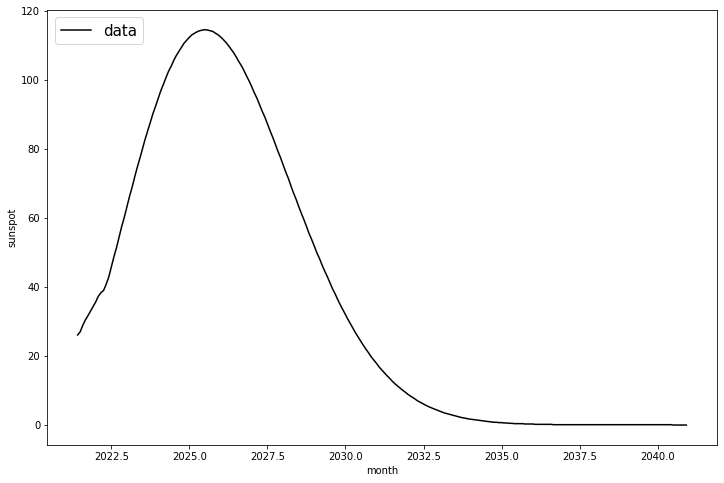

In [6]:
plt.figure(figsize=(12, 8))
plt.plot(p_month, p_sunspot, "k", label="data")
plt.legend(loc=2, prop={'size': LEGEND_SIZE})
plt.xlabel("month")
plt.ylabel("sunspot")
plt.show()

In [26]:
# h_month_new = np.array(h_month[0:500])
# h_sunspot_new = np.array(h_sunspot[0:500])
h_month_new = np.array(h_month[::13])
h_sunspot_new = np.array(h_sunspot[::13])
# h_sunspot_new = h_sunspot_new - np.mean(h_sunspot_new)


In [27]:
train_month = np.reshape(h_month_new, (-1, 1))
train_sunspot = np.reshape(h_sunspot_new, (-1, 1))
test_month = np.reshape(p_month, (-1, 1))
test_sunspot = np.reshape(p_sunspot, (-1, 1))

{'dataplot': [<matplotlib.collections.PathCollection at 0x128674610>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x128674bd0>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x128680090>]}

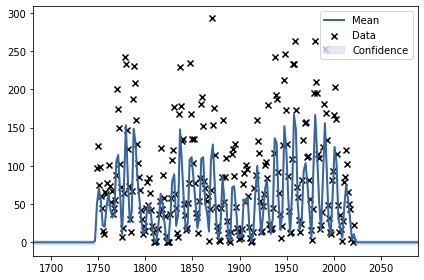

In [28]:
k1 = GPy.kern.RBF(1)
m1 = GPy.models.GPRegression(train_month, train_sunspot, k1)
m1.plot()

{'dataplot': [<matplotlib.collections.PathCollection at 0x128c0fad0>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x128c1b0d0>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x128c0fa90>]}

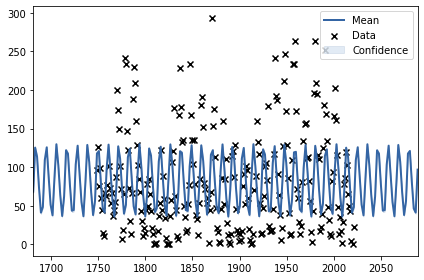

In [42]:
k2 = GPy.kern.StdPeriodic(1,period=11)
m2 = GPy.models.GPRegression(train_month, train_sunspot, k2)
m2.optimize()
m2.plot()

In [43]:
GPy.kern.StdPeriodic?

In [37]:
m2.parameters[0]

std_periodic.,value,constraints,priors
variance,5129.233633712017,+ve,
period,103.59300974065849,+ve,
lengthscale,0.9961467520698224,+ve,


{'dataplot': [<matplotlib.collections.PathCollection at 0x1287a3fd0>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x1287b2590>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x1287b2a10>]}

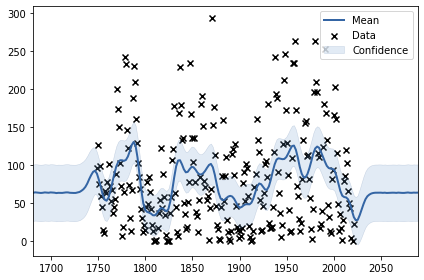

In [30]:
k3 = GPy.kern.StdPeriodic(1) + GPy.kern.RBF(1)
m3 = GPy.models.GPRegression(train_month, train_sunspot, k3)
m3.optimize()
m3.plot()

{'dataplot': [<matplotlib.collections.PathCollection at 0x128849310>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x128849890>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x128849d50>]}

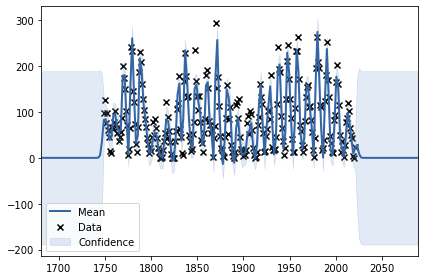

In [31]:
k4 = GPy.kern.StdPeriodic(1) * GPy.kern.RBF(1)
m4 = GPy.models.GPRegression(train_month, train_sunspot, k4)
m4.optimize()
m4.plot()

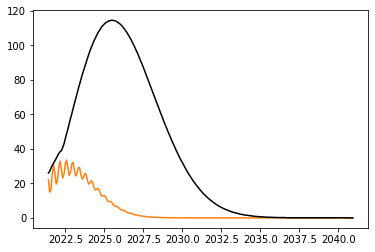

In [32]:
plt.plot(test_month, m4.predict(test_month)[0].flatten(), "C1", label="Model Predictions")
plt.plot(test_month, test_sunspot, "k", label="Model Predictions")